In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [78]:
col_names= ['JOBID', 'ACCOUNT', 'USER', 'REQMEM', 'USEDMEM', 'REQTIME', 'USEDTIME',
       'NODES', 'CPUS', 'PARTITION', 'EXITCODE', 'STATE', 'NODE1','NODE2','NODE3','NODE4','NODE5','NODE6']

accre_df = pd.read_csv('../data/accre-jobs-2020.csv', names=col_names)

accre_df = accre_df.iloc[1:]

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (7,8,13,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [79]:
accre_df.head()

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,NODE1,NODE2,NODE3,NODE4,NODE5,NODE6
1,15925210,treviso,arabella,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,cn1531,NaN,NaN,NaN,NaN,NaN
2,15861126,treviso,arabella,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,cn1441,NaN,NaN,NaN,NaN,NaN
3,15861125,treviso,arabella,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,cn1464,NaN,NaN,NaN,NaN,NaN
4,16251645,treviso,arabella,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,cn1473,NaN,NaN,NaN,NaN,NaN
5,16251646,treviso,arabella,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,cn1440,NaN,NaN,NaN,NaN,NaN


In [80]:
accre_df.tail()

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,NODE1,NODE2,NODE3,NODE4,NODE5,NODE6
3816286,24173815_8,portabella,vennie,32768Mn,30042.68M,1-00:00:00,00:02:27,1,2,production,0:0,COMPLETED,cn312,NaN,NaN,NaN,NaN,NaN
3816287,24173815_9,portabella,vennie,32768Mn,31067.75M,1-00:00:00,00:02:27,1,2,production,0:0,COMPLETED,cn312,NaN,NaN,NaN,NaN,NaN
3816288,24173815_10,portabella,vennie,32768Mn,21207.96M,1-00:00:00,00:01:40,1,2,production,0:0,COMPLETED,cn368,NaN,NaN,NaN,NaN,NaN
3816289,24173817,boysenberries,hortensia,100000Mn,0,1-00:00:00,00:03:05,1,8,production,0:0,RUNNING,cn1509,NaN,NaN,NaN,NaN,NaN
3816290,24173866,horseradish,ariane,20480Mn,0,05:00:00,00:02:05,1,1,production,0:0,RUNNING,cn1131,NaN,NaN,NaN,NaN,NaN


In [81]:
accre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3816290 entries, 1 to 3816290
Data columns (total 18 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   JOBID      object
 1   ACCOUNT    object
 2   USER       object
 3   REQMEM     object
 4   USEDMEM    object
 5   REQTIME    object
 6   USEDTIME   object
 7   NODES      object
 8   CPUS       object
 9   PARTITION  object
 10  EXITCODE   object
 11  STATE      object
 12  NODE1      object
 13  NODE2      object
 14  NODE3      object
 15  NODE4      object
 16  NODE5      object
 17  NODE6      object
dtypes: object(18)
memory usage: 524.1+ MB


#### Need to change NODES and CPU to integers

In [82]:
accre_df['NODES'] = accre_df['NODES'].astype(int)
accre_df['CPUS'] = accre_df['CPUS'].astype(int)

In [83]:
accre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3816290 entries, 1 to 3816290
Data columns (total 18 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   JOBID      object
 1   ACCOUNT    object
 2   USER       object
 3   REQMEM     object
 4   USEDMEM    object
 5   REQTIME    object
 6   USEDTIME   object
 7   NODES      int64 
 8   CPUS       int64 
 9   PARTITION  object
 10  EXITCODE   object
 11  STATE      object
 12  NODE1      object
 13  NODE2      object
 14  NODE3      object
 15  NODE4      object
 16  NODE5      object
 17  NODE6      object
dtypes: int64(2), object(16)
memory usage: 524.1+ MB


In [84]:
accre_df['ACCOUNT'].value_counts()

cms         807408
cep         609282
summer      380840
galia       198180
carrot      192551
             ...  
flamingo         1
with             1
pearl            1
purple           1
tree             1
Name: ACCOUNT, Length: 175, dtype: int64

In [85]:
accre_df['STATE'].value_counts()

COMPLETED              3804644
CANCELLED                 6107
RUNNING                   3108
FAILED                    1406
CANCELLED by 686562        681
OUT_OF_MEMORY               94
TIMEOUT                     80
CANCELLED by 505355         63
CANCELLED by 855431         17
CANCELLED by 782611         13
CANCELLED by 9206            9
CANCELLED by 397600          7
CANCELLED by 200557          6
CANCELLED by 0               5
CANCELLED by 199766          4
CANCELLED by 454080          4
CANCELLED by 486541          4
CANCELLED by 483348          3
CANCELLED by 9201            3
CANCELLED by 649319          3
CANCELLED by 9202            3
CANCELLED by 124006          2
CANCELLED by 199066          2
CANCELLED by 895426          2
CANCELLED by 90423           2
CANCELLED by 791651          2
CANCELLED by 666860          2
CANCELLED by 515423          2
CANCELLED by 546080          2
CANCELLED by 693461          2
CANCELLED by 503585          1
CANCELLED by 781109          1
CANCELLE

In [86]:
accre_df['PARTITION'].value_counts()

production              3311788
nogpfs                   327652
sam                       79151
pascal                    48004
turing                    39406
debug                      6738
maxwell                    3348
cgw-capra1                   83
cgw-dougherty1               72
cgw-cqs1                     34
cgw-vm-qa-flatearth1          4
cgw-cqs3                      4
cgw-rocksteady                2
cgw-tbi01                     2
devel                         2
Name: PARTITION, dtype: int64

#### Do any of the production partition nodes show an unusual number of failed jobs relative to the others? (Ignore Debug Partition)

Let's check to see failure by node

In [87]:
accre_df_failures = accre_df[accre_df['STATE'] == 'FAILED']
accre_df_failures.head()

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,NODE1,NODE2,NODE3,NODE4,NODE5,NODE6
8630,17094238,cms,cmspilot,186648Mn,1.78M,2-00:00:00,00:01:11,1,0,nogpfs,1:0,FAILED,cn1554,NaN,NaN,NaN,NaN,NaN
8633,17094335,cms,cmspilot,186648Mn,8.38M,2-00:00:00,00:01:26,1,0,nogpfs,1:0,FAILED,cn1544,NaN,NaN,NaN,NaN,NaN
22235,17072678,cms,cmspilot,21875Mn,11310.72M,2-00:00:00,00:02:35,1,8,nogpfs,126:0,FAILED,ng909,NaN,NaN,NaN,NaN,NaN
56717,17150413,blueberries,leva,4096Mn,1968.02M,10:00:00,02:15:54,1,1,pascal,1:0,FAILED,gpu0021,NaN,NaN,NaN,NaN,NaN
68662,17178412,cubanelle,robyn,1024Mc,73.32M,00:15:00,00:14:17,1,1,pascal,2:0,FAILED,gpu0021,NaN,NaN,NaN,NaN,NaN


In [88]:
accre_df_failures['NODE1'].value_counts()

gpu0019           96
gpu0023           60
gpu0014           38
gpu0013           36
gpu0020           36
                  ..
cn1084             1
gpu[0032-0034]     1
gpu0047            1
cn461              1
cn[361             1
Name: NODE1, Length: 420, dtype: int64

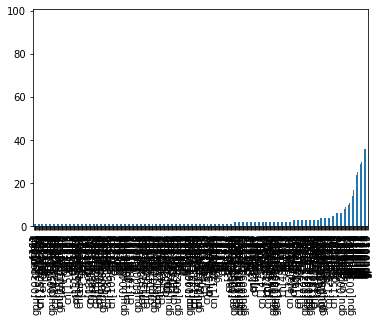

In [98]:
accre_df_failures['NODE1'].value_counts(ascending = True).plot(kind='bar')